In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import pandas as pd
import seaborn as sns
import time
from tqdm import tqdm
import itertools
import time

In [10]:
# пакет для работы с множественным тестированием гипотез
from statsmodels.stats.multitest import multipletests

# критерий стюдента для независимых выборок
from  statsmodels.stats.weightstats import ttest_ind

In [2]:
%%time
data = pd.read_csv('homework_data/sem_4/zhiboedova.aa.csv', header=None)
#data = pd.read_csv('homework_data/sem_4/kobzeva.an.csv', header=None)
data.head()

FileNotFoundError: [Errno 2] File b'homework_data/sem_4/zhiboedova.aa.csv' does not exist: b'homework_data/sem_4/zhiboedova.aa.csv'

In [112]:
p_values = []
count = 0
for i in data.columns:
    for j in data.columns[i + 1:]:
        p_value = ttest_ind(data[i].values, data[j].values, alternative='two-sided', usevar = 'unequal')[1]
        p_values.append(p_value)
        if p_value <= 0.05:
            count += 1
            print('{} - {}-столбец, {}-столбец зависимы : {}'.format(count, i, j, p_value))

1 - 0-столбец, 1-столбец зависимы : 0.0009998313029524817
2 - 0-столбец, 3-столбец зависимы : 3.846003636287485e-05
3 - 0-столбец, 4-столбец зависимы : 0.0001941941499849169
4 - 0-столбец, 7-столбец зависимы : 0.011883532372908843
5 - 1-столбец, 2-столбец зависимы : 1.2225568556550231e-05
6 - 1-столбец, 5-столбец зависимы : 2.1327309439584664e-05
7 - 1-столбец, 6-столбец зависимы : 0.00033965539165465463
8 - 1-столбец, 8-столбец зависимы : 0.00010242321613125003
9 - 2-столбец, 3-столбец зависимы : 6.992215806390439e-08
10 - 2-столбец, 4-столбец зависимы : 6.148029573149707e-07
11 - 2-столбец, 7-столбец зависимы : 0.00025654022556977193
12 - 3-столбец, 5-столбец зависимы : 2.1653641563753642e-07
13 - 3-столбец, 6-столбец зависимы : 9.912054049924339e-06
14 - 3-столбец, 8-столбец зависимы : 9.75721223401724e-07
15 - 4-столбец, 5-столбец зависимы : 1.6076517904868632e-06
16 - 4-столбец, 6-столбец зависимы : 5.431017615659523e-05
17 - 4-столбец, 8-столбец зависимы : 7.790402681752905e-06
1

In [113]:
0.05/len(data.columns)

0.005555555555555556

Для поправки Бонферрони уровень значимости рассчитывается как $\dfrac{\alpha}{n} = \dfrac{0.05}{9} = 0.006$

In [114]:
for k in ['bonferroni', 'holm']:
    p_values_ch = multipletests(p_values, method = k)[1]
    count = np.where(multipletests(p_values, method = k)[0] == False)[0].size
    #plt.plot(data.columns, p_values_ch)
    print('{} - количество пар столбцов для гипотезы {}'.format(count, k))

19 - количество пар столбцов для гипотезы bonferroni
18 - количество пар столбцов для гипотезы holm


__Метод Шведера-Спьётволла__ ($\lambda = 0.5$): 

$m_0 = \dfrac{1}{1-\lambda}\left(1 + \sum_1^m[p_i > \lambda]\right)$

In [143]:
Lambda = 0.5
m_0 = 1/(1 - Lambda) * (1 + sum(np.array(p_values) > Lambda))
m_0

22.0

Text(0,0.5,'p_value')

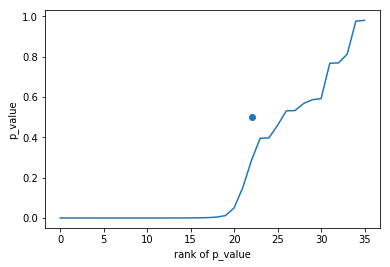

In [145]:
x = [i for i in range(len(p_values))]
y = np.sort(np.array(p_values))
plt.plot(x, y)
plt.scatter(m_0, Lambda, label='m_0, lambda')
plt.xlabel('rank of p_value')
plt.ylabel('p_value')